# **KSP 5.0 Selection Assignment**





# Writeup on Problem Solving Approach

In this assignment, I applied theoretical astrophysics concepts through computational analysis using Python libraries such as NumPy, Pandas, and Matplotlib.
### Data Collection and Preparation:
I only used the provided data through the .csv files. Then, I processed and cleaned the data using Pandas to ensure accuracy and reliability.
### Computational Implementation:
Leveraging the computational prowess of Python, I translated the theoretical frameworks into code. NumPy enabled efficient numerical computations, while Pandas simplified data manipulation and analysis. Matplotlib helped visualize the results in a straight and interpretable manner.
### Analysis and Interpretation:
Upon obtaining computed results, I analyzed them to determine trends, correlations, and anomalies in celestial properties. 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Section 1: Calculating the Redshift of Galaxies

You are given the data for all the galaxies in the cluster in the file 'galaxy.csv'.

This includes the name of the galaxy, observed wavelength of the $H\alpha$ line $\lambda_{H\alpha}$, Right Ascension at J2000.0 and Declination and J2000.0 (You can read more about RA and Dec [here](https://en.wikipedia.org/wiki/Equatorial_coordinate_system))

In [10]:
galaxy_data = pd.read_csv('galaxy.csv')


Since the galaxies would have some radial velocities with respect to us, the wavelengths we observed would be [redshifted](https://en.wikipedia.org/wiki/Redshift) due to doppler effect.

Using the value of the Observed Wavelength of $H\alpha$ line (Rest Wavelength $\lambda_{H\alpha0} = 6562.8nm)$, calculate the redshift of the galaxies in our cluster.

Use this to find their radial velocities of the galaxies and plot it.

(Assume that the observed wavelength has been correscted for the motion of earth around sun, and motion of sun around the center of Milky Way. Put more simply, these are the wavelengths you would have observed if you were at rest at the center of Milky Way)

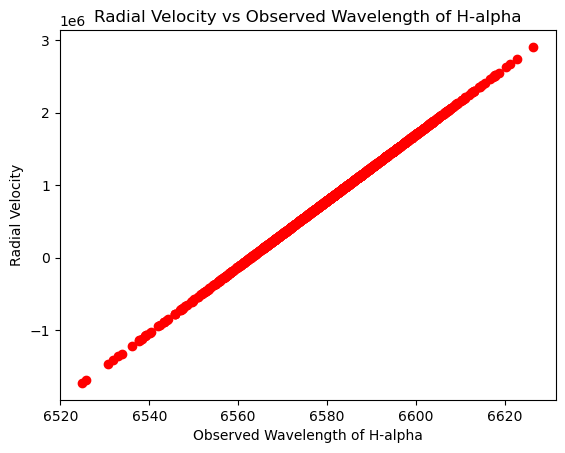

In [11]:
# Constants
REST_LAMBDA = 6562.8  # in nm
C = 3e8  # speed of light in m/s

# Calculate redshift and radial velocity
redshift = (galaxy_data['Observed Wavelength of H-alpha'] - REST_LAMBDA) / REST_LAMBDA
radial_velocity = C * redshift

# Add radial velocity to the dataframe and save it as a csv file
galaxy_data.insert(5, 'velocity', np.abs(radial_velocity), False)
galaxy_data.to_csv('galaxy_1.csv')

# Plot the results
plt.plot(galaxy_data["Observed Wavelength of H-alpha"], radial_velocity, 'ro')
plt.xlabel("Observed Wavelength of H-alpha")
plt.ylabel("Radial Velocity")
plt.title("Radial Velocity vs Observed Wavelength of H-alpha")
plt.show()

Using the data from galaxy.csv, answer the following questions.

For your convenience, the RA and Dec data has been converted from the format $a^\circ b^m c^s$ to $xx^\circ$ below


In [12]:
temp = galaxy_data['RA J2000.0'].str.split(' ', expand=True)
galaxy_data['RA J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600
temp = galaxy_data['Dec J2000.0'].str.split(' ', expand=True)
galaxy_data['Dec J2000.0'] = temp[0].astype(float) + temp[1].astype(float) / 60 + temp[2].astype(float) / 3600

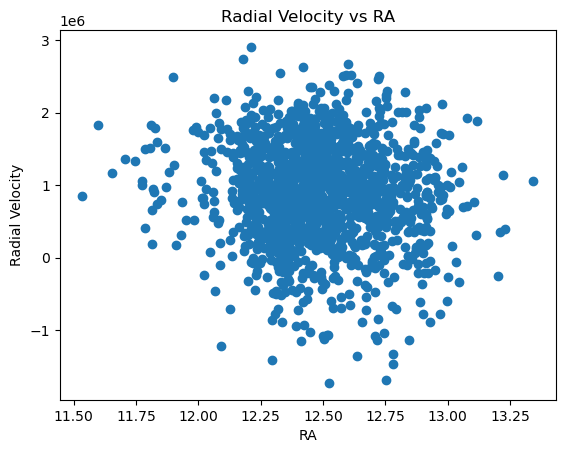

In [13]:
# Plot of radial velocity vs RA
plt.scatter(galaxy_data['RA J2000.0'],radial_velocity)
plt.xlabel('RA')
plt.ylabel('Radial Velocity')
plt.title('Radial Velocity vs RA')
plt.show()

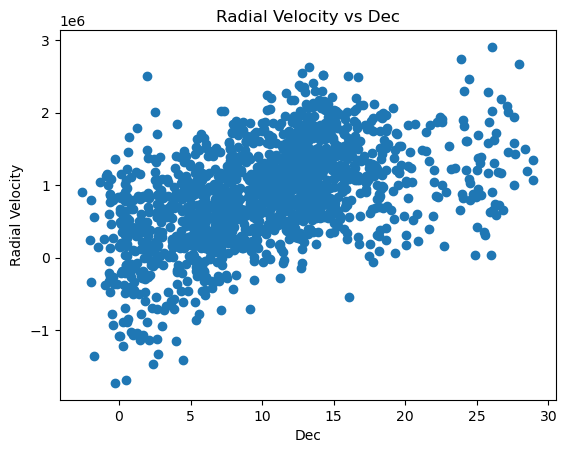

In [14]:
# Plot of radial velocity vs Dec
plt.scatter(galaxy_data['Dec J2000.0'],radial_velocity)
plt.xlabel('Dec')
plt.ylabel('Radial Velocity')
plt.title('Radial Velocity vs Dec')
plt.show()

***

###Q1.1. What is the approximate angular size of the galaxy cluster?

\<The approximate angular size of galaxy is 31.4997 degrees.\>


***

###Q1.2. Can you comment anything about the rotation of the galaxies around the center of the cluster.
HINT: You may find it useful to plot a scatter plot of RA and DEC with radial velocity as colormap.

\<The colour map reveals a pattern consistent with the rotation of galaxies around the cluster centre. Most galaxies exhibit velocities close to the cluster's central velocity, with deviations likely due to their angular momenta. The colour gradient transitions from blue to greenish-yellow across the graph, suggesting anticlockwise rotation, considering line-of-sight velocities. \>   

***

Angular size: 31.4997 degrees


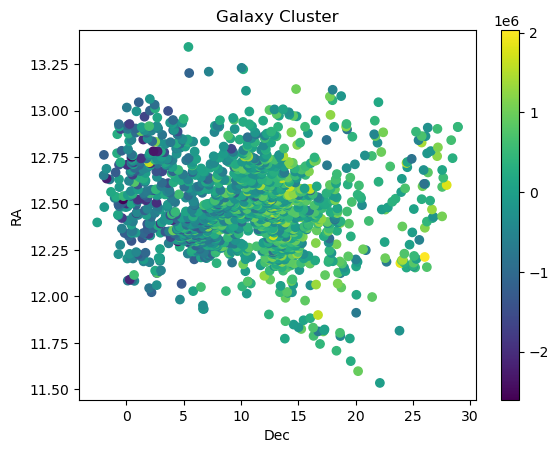

In [15]:
# Creating a Colour-Map
def angular_distance(ra1, dec1, ra2, dec2): #Defining a function to calculate angular separation by formula given in numpy tutorial
    """
    Calculate the angular distance between two points on the celestial sphere.

    Parameters:
    ra1, dec1 (float): Right ascension and declination of the first point
    ra2, dec2 (float): Right ascension and declination of the second point

    Returns:
    float: Angular distance in radians
    """
    return np.arccos(np.sin(dec1) * np.sin(dec2) + np.cos(dec1) * np.cos(dec2) * np.cos(ra1 - ra2))

# Calculate the angular size of the galaxy cluster
angular_distances = []
for i in range(len(galaxy_data)):
    for j in range(len(galaxy_data)):
        if i!= j:  # avoid calculating distance to itself
            e=angular_distance(galaxy_data['RA J2000.0'][i]*np.pi/180,galaxy_data['Dec J2000.0'][i]*np.pi/180,galaxy_data['RA J2000.0'][j]*np.pi/180,galaxy_data['Dec J2000.0'][j]*np.pi/180)
            angular_distances.append(e)

angular_size = max(angular_distances)
print(f"Angular size: {angular_size*180/np.pi:.4f} degrees")

# Plot the galaxy data
plt.scatter(galaxy_data['Dec J2000.0'], galaxy_data['RA J2000.0'], c=radial_velocity-np.mean(radial_velocity))
plt.colorbar()
plt.xlabel("Dec")
plt.ylabel("RA")
plt.title("Galaxy Cluster")
plt.show()

#Section 2: Calibrating Cepheids Data

NOTE: Although there are no prerequisities for this section, it relies a bit on knowledge about cepheids and their Period-Luminosity Relation. Necessary resource links have been provided wherever needed. You are strongly encouraged to use the internet to aid as a reference whenever needed.
***

The [Gaia Mission](https://en.wikipedia.org/wiki/Gaia_(spacecraft) aims at cataloging and create a precise three-dimensional map of astronomical objects throughout the Mily Way. It maps the motion of the stars, which encode the origin and subsequent evolution of the Milky Way. The spectrophotometric measurements provide detailed physical properties of all stars observed, characterizing their luminosity, effective temperature, gravity and elemental composition.





In [16]:
gaia_data = pd.read_csv('gaia.csv')

Cepheids are a particular type of variable stars that pulsates radially, varying in both diameter and temperature. They **changes in brightness**, with a **well-defined stable period and amplitude**.

The file 'gaia.csv' includes data for about 5000 Cepheid Variable Stars in our own galaxy. In particular, the file contains the following data fields:
   
*   Unique ID of the Source Star
*   Parallax (in milli arcseconds) : You can read more about parallax [here](https://en.wikipedia.org/wiki/Stellar_parallax)
*   Mean **Apparent** Magnitude ($m$)
*   TIme period of Pulsations P(in days)



Classical Cepheids follow the [Period Luminosity Law](https://en.wikipedia.org/wiki/Period-luminosity_relation#The_relations), also commonly known as the Leavitt Law.

It basically states that there is an empirical relation between the pulsation period $(P)$ of a Cepheid Star and it's **Absolute Magnitude** ($M$) of the form -

#### $\begin{equation}M = \alpha \log_{10}(P \text{(in days)}) + \beta \end{equation}$
***

### Your aim is to verify Leavitt Law for cepheids using the given data, and find the values of $\alpha$ and $\beta$.

You may find it helpful to use the function 'poly_fit' in numpy for this.

Formula for absolute magnitude: 
$$M=m-5\log(d)+5$$
where d is in parsec $$d=\frac{1}{parallax(in \, arc \, second)}$$

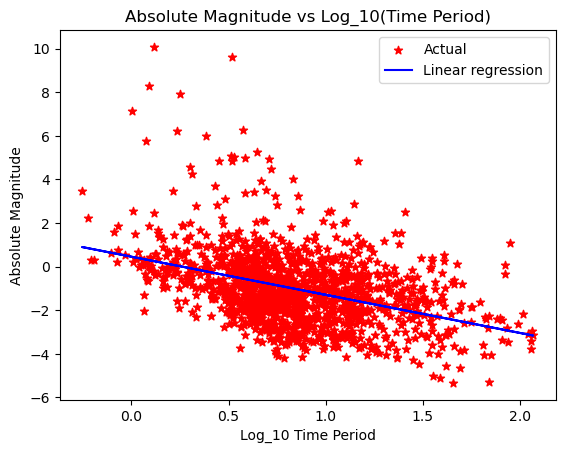

alpha equals -1.7501625569120909
beta equals 0.4529616510537216


In [17]:
# Calculate the absolute magnitude
M = gaia_data['mean apparent magnitude'] + 5 * np.log10(gaia_data['parallax']*1e-3)+5

#Using Linear Regression

# Preprocess data
x_train = np.log10(gaia_data['time period'])
y_train = M

# Define gradient function
def compute_gradient(w, b):
    A = np.mean((w * x_train + b - y_train) * x_train)
    B = np.mean(w * x_train + b - y_train)
    return A, B

# Define gradient descent function
def compute_gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters):
    w = w_init
    b = b_init
    for i in range(num_iters):
        w -= alpha * compute_gradient(w, b)[0]
        b -= alpha * compute_gradient(w, b)[1]
    return w, b

# Run gradient descent
tup_w_b = compute_gradient_descent(x_train, y_train, 0, 13, 0.03, 10000)
alpha=tup_w_b[0]
beta=tup_w_b[1]
# Plot results
y = tup_w_b[0] * x_train + tup_w_b[1]
plt.scatter(x_train, y_train, marker='*', c='r', label='Actual')
plt.plot(x_train, y, c='b', label='Linear regression')
plt.xlabel('Log_10 Time Period')
plt.ylabel('Absolute Magnitude')
plt.title('Absolute Magnitude vs Log_10(Time Period)')
plt.legend()
plt.show()

# Print the values of alpha and beta
print(f'alpha equals {alpha}')
print(f'beta equals {beta}')

***
### Some useful information about the Magnitude system

The brightness of a star as seen by some observer is dependent on the observer's distance from the star as well as the intrinsic brightness of the star (ignoring any absorption in the intervening space).

In astronomy, brightness of a star, as seen by some observer, is measured in terms of its **apparent magnitude ($m$)**. For two stars (1 and 2) with fluxes $f_1$ and $f_2$ respectively, their apparent magnitudes $m_1$ and $m_2$ are related by:

$m_1 - m_2 = 2.5 \log_{10} \left( \frac{f_1}{f_2} \right)$

**Absolute magnitude ($M$)** of any star is its apparent magnitude if the star was exactly 10 parsecs away from the observer. Thus, $M$ only depends on the intrinsic brightness of the star.

***


# Section 3: Getting the distances to our galaxies

Now that we have our period-luminosity relation, we can observe cepheids in the galaxies in our cluster and use this to get the distances to our galaxies. (Yes, this is possible! Hubble Telescope actually observed Cepheids in the galaxies in Virgo Cluster)


For this, you have been given the data file 'cepheid.csv' which contains the following data fields:
*   Unique ID of the Cepheid
*   Name of the Galaxy to which it belongs
*   Mean Apparent Magnitude (m)
*   Time Period of Pulsation (in days)

In [18]:
#your code here
cepheid_data = pd.read_csv('cepheid.csv')

$$\log(d)=\frac{m-M+5}{5}$$
$$M = \alpha \log_{10}(P \text{(in days)}) + \beta $$

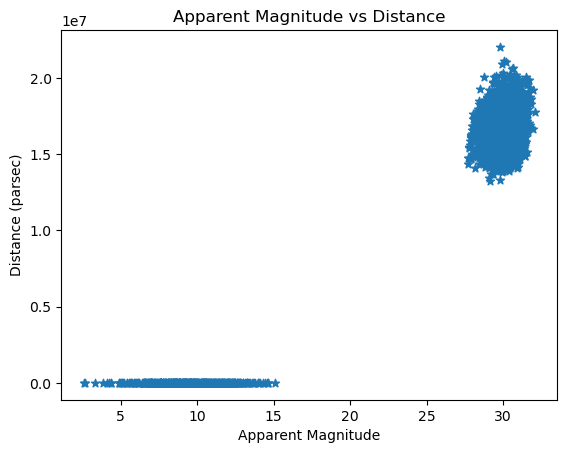

In [19]:
# Calculate absolute magnitude using Section-2 value
M_new = alpha * np.log10(cepheid_data['Period']) + beta
# Calculate distances using apparent magnitude formula
distances = 10 ** ((cepheid_data['Apparent Magnitude'] - M_new+5) / 5) #in parsec

# Plot apparent magnitude vs distance
plt.scatter(cepheid_data['Apparent Magnitude'], distances, marker='*')
plt.xlabel('Apparent Magnitude')
plt.ylabel('Distance (parsec)')
plt.title('Apparent Magnitude vs Distance')
plt.show()


In [20]:
# Finding Outliers:
outliers = [(id, galaxy) for id, galaxy, distance in zip(cepheid_data['Cepheid ID'], cepheid_data['Galaxy_ID'], distances) if (distance < 5e6)]

if outliers:
    for id, galaxy in outliers:
    # Drop rows from cepheid_data where Galaxy_ID is in the outliers list
        distances.drop(cepheid_data[cepheid_data['Galaxy_ID'].isin([galaxy for id, galaxy in outliers])].index, inplace=True)
        cepheid_data.drop(cepheid_data[cepheid_data['Galaxy_ID'].isin([galaxy for id, galaxy in outliers])].index, inplace=True)

cepheid_data.insert(4, 'distance', distances, allow_duplicates=False)
cepheid_data.to_csv('cepheid_new.csv')


Use the Period-Luminosity Law derived in Section-2 and the above data to find an estimate for the distance to each galaxy in the cluster.

Make sure to handle outliers in the above data. The data may contain some cepheids that actually DO NOT belong to the given galaxy, but it just seems to us that this is the case since they fall along the same line of sight.
***

# Section 4: Getting the Hubble's Constant

The famous [Hubble's Law](https://en.wikipedia.org/wiki/Hubble%27s_law) is the observation that galaxies are moving away from Earth at speeds proportional to their distance.

$v = H_0 d$

where $H_0$ is the proportionalaity constant, also known as the Hubble's Constant.

Now that we have an estimate for the radial velocities and distance to the galaxies in our cluster, we need to find an estimate of the Hubble Constant (H).

Fit gaussians on your velocity and distance data and report the mean and standard deviation of the same. Also plot the histograms and the fitted gaussian.

In [25]:
Hubble = []
galaxy_distance=[]
for i in range(len(galaxy_data)):
    cepheid_distances = cepheid_data[cepheid_data['Galaxy_ID'] == galaxy_data['Name'][i]]['distance']
    if len(cepheid_distances) > 0:
        Hubble.append(galaxy_data['velocity'][i]*1000 / np.mean(cepheid_distances))
        galaxy_distance.append(np.mean(cepheid_distances))

H_0 = np.mean(Hubble)
error=np.std(Hubble)
print(f'Hubble\'s Constant: {H_0} ± {error} km/s/Mpc')

Hubble's Constant: 56.75564136490981 ± 33.27053655291446 km/s/Mpc


Mean Distance: 16787465.339684706 parsec, Standard Deviation: 971716.9825114891 parsec
Mean Velocity: 954393.9813122095 m/s, Standard Deviation: 555749.6400643209 m/s


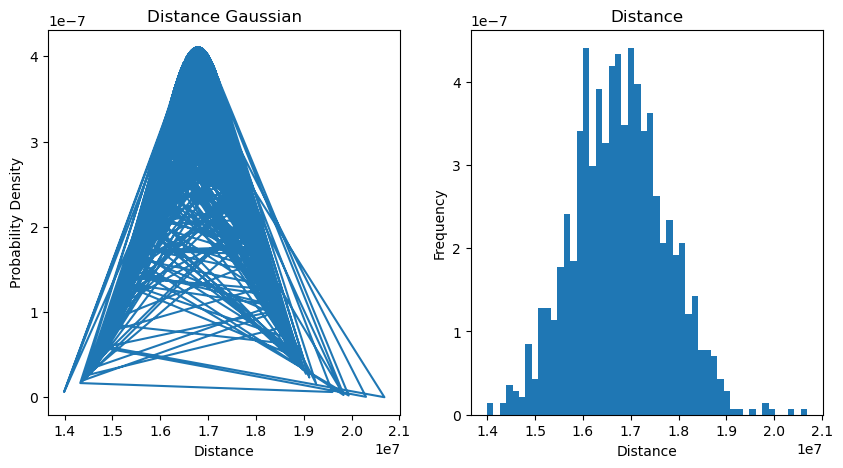

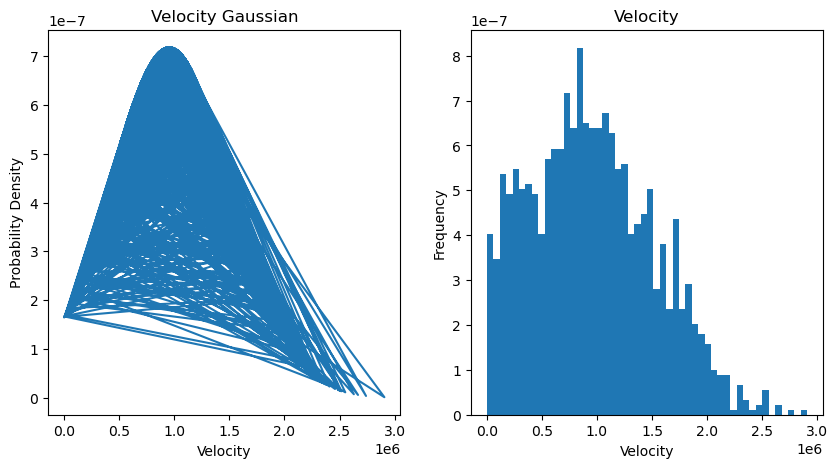

In [22]:
# Fit Gaussian on velocity and distance data
mean_distance = np.mean(galaxy_distance)
mean_velocity = np.mean(galaxy_data['velocity'])
std_distance = np.std(galaxy_distance)
std_velocity = np.std(galaxy_data['velocity'])

# Plot histograms with fitted gaussians
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Distance Gaussian
axs[0].plot(galaxy_distance, norm.pdf(galaxy_distance, mean_distance, std_distance))
axs[0].set_title("Distance Gaussian")
axs[0].set_xlabel("Distance")
axs[0].set_ylabel("Probability Density")

# Distance histogram
axs[1].hist(galaxy_distance, bins=50, density=True)
axs[1].set_title("Distance")
axs[1].set_xlabel("Distance")
axs[1].set_ylabel("Frequency")


print(f"Mean Distance: {mean_distance} parsec, Standard Deviation: {std_distance} parsec")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Velocity Gaussian
axs[0].plot(galaxy_data['velocity'], norm.pdf(galaxy_data['velocity'], mean_velocity, std_velocity))
axs[0].set_title("Velocity Gaussian")
axs[0].set_xlabel("Velocity")
axs[0].set_ylabel("Probability Density")

# Velocity histogram
axs[1].hist(galaxy_data['velocity'], bins=50, density=True)
axs[1].set_title("Velocity")
axs[1].set_xlabel("Velocity")
axs[1].set_ylabel("Frequency")

print(f"Mean Velocity: {mean_velocity} m/s, Standard Deviation: {std_velocity} m/s")

plt.show()

Using the values obtained in the previous part, report your value of $H$ along with the error margins.

***

#### Q4.1 Compare the value of $H$ that you got from the standard $H_0$ commonly accepted today. The estimate that you got - is it the same (within error margins), higher or lower than the value of $H_0$.

\< The current accepted Hubble constant, H₀, is approximately 70 km/s/Mpc. However, my calculated value is around 57 km/s/Mpc with a margin of error of 33. Although my estimation is slightly lower than the standard, H₀ falls within the range of uncertainty in my calculation.\>

***

#### Q4.2 What might be the reason behind this difference in values

\< The discrepancy in the calculated Hubble constant could arise from inaccuracies in determining distances, absolute magnitudes, and velocities. Additionally, errors may occur from assumptions such as uniform mass distribution among galaxies and treating clusters as spherical bodies. These factors contribute to uncertainties in the value of H. \>

***

# Section 5 : Dark Matter

Dark matter is a component of the universe whose presence is discerned from its gravitational attraction rather than its luminosity.

***

#### Q5.1 ESTIMATE the total mass of the Galaxy Cluster. This includes mass due to visible matter as well as dark matter.

HINT: The [Virial Theorem](https://phys.libretexts.org/Bookshelves/Classical_Mechanics/Variational_Principles_in_Classical_Mechanics_%28Cline%29/02%3A_Review_of_Newtonian_Mechanics/2.11%3A_Virial_Theorem) provides a general equation that relates the average over time of the total kinetic energy of a stable system of discrete particles, bound by a conservative force
 $$ \left<KE\right> = -\frac{1}{2} \left<PE\right> $$

$$ Mass\,of\,galaxy\,cluster:1.9203518396742735*10^{45}\,kg


Using Virial Theorem, Mass of cluster can be approximated as: 
$$M=\frac{R<v>^2}{G} $$ 
where G is Universal Gravitation Constant

and R is given by
$$R=<d>sin(\frac{angular size}{2})$$

In [23]:
# Define constants
G = 6.67e-11  # Gravitational constant in m^3 kg^-1 s^-2

# Calculate mean radial velocity and distance
v = np.mean(galaxy_data['velocity']) 
d = np.mean(galaxy_distance) * 3.086e+16  # convert distance to meters

# Calculate radius and mass
R = d*np.sin(angular_size / 2)
mass = R * v**2 / G

# Print result
print(f"Estimated mass: {mass} kg")

Estimated mass: 1.9203518396742735e+45 kg



***

#### Q5.2 ESTIMATE the visible mass in the galaxy cluster. Use the Mass - Luminosity Relation for Main-Sequence Stars, assuming that it holds well for galaxies too. You may use the Milky Way as a reference.

Absolute Magnitude of Milky Way $ \approx -21 mag$

Visible mass of Milky Way $\approx 2 \times 10 ^ {11} M_{sun}$

$$Visible\,Mass:1.6945405559646675*10^{41}\,kg $$

Mass Luminosity Relation:
$$\frac{L}{L_0}=(\frac{M}{M_0})^a $$
where a=3.5 for main sequence stars

In [24]:
# Constants
LUMINOSITY_SCALAR = -1*21
MASS_SCALAR = 4e41

# Calculate the mean luminosity
L = np.mean(M_new)

# Calculate the visible mass
Mass_visible = MASS_SCALAR * (L / LUMINOSITY_SCALAR) ** (1 / 3.5)

# Print the visible mass
print("Visible Mass: ", Mass_visible)

# Calculate the fraction of dark matter
mass_dark_frac = 1 - Mass_visible / mass

# Print the fraction of dark matter
print("Fraction of Dark Matter: ", mass_dark_frac)

Visible Mass:  1.6945405559646675e+41
Fraction of Dark Matter:  0.9999117588495526


***

#### Q5.3 What is the fraction of the total mass of the galaxy cluster that is actually in the form of Dark Matter

\< Fraction of Mass which is Dark Matter:  0.9999117588495526 \>

***